# Heart Disease Prediction 

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from IPython.display import HTML, display
import plotly.express as px
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import time

C:\Users\abhin\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)



In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.shape

(918, 12)

In [6]:
def cat(col,dic,df):
    df[col]=df[col].map(dic)
    return df


replacement_Heart_Disease = {0: "Normal",1: "Heart Disease"} 
replacement_FastingBS={0:"Less than 120 mg/dl",1:"More than 120 mg/dl"}

x=[replacement_Heart_Disease,replacement_FastingBS]

y=['HeartDisease','FastingBS']

for i in range(len(x)):
    df=cat(y[i],x[i],df)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


## Attribute Information

Attribute Information

1. Age: age of the patient in years

2. Sex: sex of the patient 

        M: Male
        F: Female

3. ChestPainType: chest pain type

        TA: Typical Angina
        ATA: Atypical Angina
        NAP: Non-Anginal Pain
        ASY: Asymptomatic

4. RestingBP: resting blood pressure in mmHg

5. Cholesterol: serum cholesterol in mm/dl

6. FastingBS: fasting blood sugar

        1: if FastingBS > 120 mg/dl
        0: otherwise

7. RestingECG: resting electrocardiogram results 

        Normal: Normal 
        ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9. ExerciseAngina: exercise-induced angina

        Y: Yes
        N: No

10. Oldpeak: oldpeak = ST [Numeric value measured in depression]

11. ST_Slope: the slope of the peak exercise ST segment

        Up: upsloping
        Flat: flat
        Down: downsloping

12. HeartDisease: output class

        1: heart disease
        0: Normal


## Random Sampling

 Defining a random sampling function will ensure we have the same split and will get the same result every time we run our program. We want the test set to be 20% and train to be 80% of our data ###

# 2) Train test split

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=7)
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

734 train and 184 test instances


### Defining a stratified sampling will help to have the same split and the same result every time. We will set test set (20%) and training set(80%) ###


## Stratified Sampling

In [9]:
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, random_state=7,
                                                  stratify=df["HeartDisease"])
print(f"{strat_train_set.shape[0]} train and {strat_test_set.shape[0]} test instances")

734 train and 184 test instances


In [10]:
# creating a function to check the percentage of stratified splitting
def get_data(data):
    
    return round(100*(data["HeartDisease"].value_counts()/len(data)),2)

proportion=pd.DataFrame({
    "Overall_ratio":get_data(df),
    "Train_set":get_data(strat_train_set),
    "Test_set":get_data(strat_test_set)
})
proportion.head()

,Overall_ratio,Train_set,Test_set
Heart Disease,55.34,55.31,55.43
Normal,44.66,44.69,44.57


<AxesSubplot:>

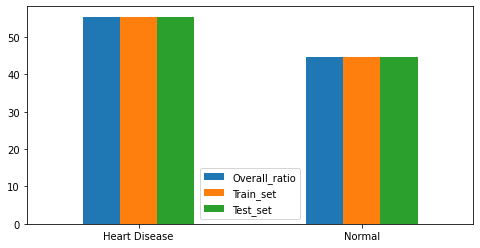

In [11]:
proportion.plot(kind="bar",figsize=(8,4),rot=0)

## Error Comparision B/W Random And Stratified Sampling

### We need to compare the result of sampling and which type of sampling will be useful for our analyzing. ###

In [12]:
def heart_disease(data):
    return data["HeartDisease"].value_counts() / len(data)

# creating a random split
rand_train_set, rand_test_set = train_test_split(df, test_size=0.2, random_state=7)

# creating a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": heart_disease(df),
    "Random test set": heart_disease(rand_train_set),
    "Stratified test set": heart_disease(strat_train_set),
}).sort_index()

# add two more columns for the differnece percentage in random sampling and stratifed sampling
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
Heart Disease,0.553377,0.564033,0.553134,1.925594,-0.043983
Normal,0.446623,0.435967,0.446866,-2.385858,0.054496


Stratified sampling has similar result as overall classification.Error is also low over random sampling

### Changing Train and Test dataset Name

In [13]:
train_set = strat_train_set
test_set = strat_test_set

In [14]:
train_set.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
409,53,M,NAP,160,0,More than 120 mg/dl,LVH,122,Y,0.0,Flat,Heart Disease
871,61,M,NAP,150,243,More than 120 mg/dl,Normal,137,Y,1.0,Flat,Normal
371,66,M,ASY,150,0,Less than 120 mg/dl,Normal,108,Y,2.0,Flat,Heart Disease
837,57,M,NAP,150,168,Less than 120 mg/dl,Normal,174,N,1.6,Up,Normal
43,52,M,NAP,140,259,Less than 120 mg/dl,ST,170,N,0.0,Up,Normal


<AxesSubplot:>

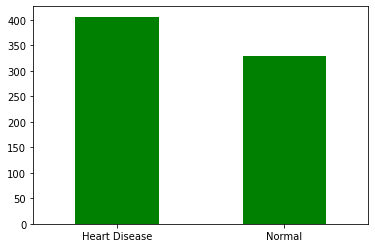

In [15]:
train_set["HeartDisease"].value_counts().plot(kind='bar',rot=0,color="green")

## Descriptive Statistics for Continous Variable

In [16]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,734.0,53.382834,9.369730,28.0,47.00,54.0,60.00,77.0
RestingBP,734.0,132.508174,19.010855,0.0,120.00,130.0,140.00,200.0
Cholesterol,734.0,197.957766,109.108265,0.0,172.25,221.0,265.75,603.0
MaxHR,734.0,136.871935,25.503817,67.0,120.00,138.0,155.00,202.0
Oldpeak,734.0,0.897548,1.073871,-2.6,0.00,0.6,1.50,6.2


In [17]:
category_col=df.select_dtypes("object").columns.to_list()
category_col

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

## Descriptive Statistics for Categorical Variables

In [18]:
#### make display look nice ####
def blk(block_title: str) -> None:
    """
    Print a nice section title
    """
    blk = "=" * 7
    print(f"\n{blk} {block_title} {blk}")


def display_tables(df_list: list) -> None:
    """
    Display tables in the cell horizontally.
    Take up all the space before going to the next row.
    """
    html = ''
    for df in df_list:
        html_df = df.to_html().replace(
            '<table ', '<table style="float: left; margin-right: 20px" '
        )
        html += html_df

    return HTML(html)


### Data Manipulation and Organizers
def dicts_key_contain(x: dict, lookup: list) -> dict:
    """
    Returns dictionary that contains specific strings

    Args:
    x: the target dictionary
    lookup: list of string required in the keys

    Returns:
    A filtered dictionary
    """
    # incase lookup is a string
    lookup = [lookup] if isinstance(lookup, str) else lookup
    result = {}

    for k, v in x.items():
        for t in lookup:
            if t in k:
                result[k] = v
                break
    return result


### utility matrices
def search_matrix(m: int, n: int = None) -> np.array:
    """
    Args:
    m: Number of rows (and Number of cols if n is None)
    (optional)
    n: Number of cols

    Returns:
    if (m * m), returns a upper triangle = 1 and diagonal = 0 matrix
    if (m * n), returns a (m * n) = 1
    """
    if not n:
        search_mat = np.triu(np.ones((m, m)))
        # search matrix would ignore S{i}{j} if i == j
        np.fill_diagonal(search_mat, 0)
    else:
        search_mat = np.ones((m, n))

    return search_mat


def comb_matrix(a: list, b: list, *args) -> np.array:
    """
    Generate logical combinations

    Args:
    a: list of choice of logic a
    b: list of choice of logic b
    *arg: same format as a, b, ...

    Returns:
    The combination matrix
    """
    res = []
    for i in a:
        for j in b:
            res.append(np.append(i, j))
    res = np.array(res)

    # check if there are more logic to carry on
    if args:
        args = list(args)
        return comb_matrix(res, args.pop(0), *args)
    return res

In [19]:
def count_table(
    df: pd.DataFrame, cols: list, desc_of_interest: dict, suffix=''
) -> list:
    """
    Print out the unique values tables with respect to given columns

    Args:
    df: DataFrame
    cols: break out columns
    desc_of_interest: dictionary of statistics required
    """

    # print out the descriptive data for categorical data
    cat_groups = []  # store groupby df
    for col in cols:
            gp = df.groupby(col).agg(desc_of_interest)  # groupby and find results
            gp.columns = ['count']  # provide more informative names

        # find the percentage (row value / column sum)
            gp['percentage'] = gp['count'] / gp['count'].sum() * 100
            gp.index.name += f'{suffix}'
            cat_groups.append(gp)
    return cat_groups


# extract the unique values counts and %
table_general = count_table(train_set, category_col, {'HeartDisease': 'count'})
display_tables(table_general)

,count,percentage
Sex,,
F,154,20.980926
M,580,79.019074
,count,percentage
ChestPainType,,
ASY,392,53.405995
ATA,136,18.528610
NAP,167,22.752044
TA,39,5.313351
,count,percentage


In [20]:
import matplotlib.pyplot as plt
def catgraph(columns):
    fig, ax = plt.subplots(1, len(columns), figsize=(15, 5))
    for i, categorical_feature in enumerate(train_set[columns]):
        train_set[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
      

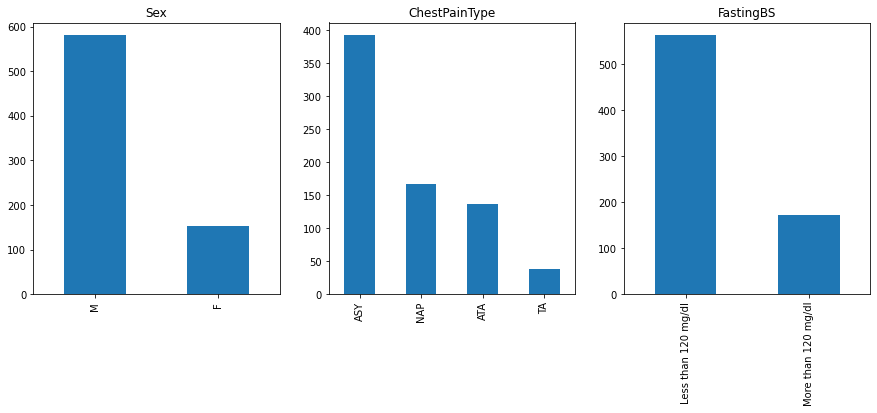

In [21]:
categorical_features1 = ['Sex','ChestPainType','FastingBS']
catgraph(categorical_features1)  

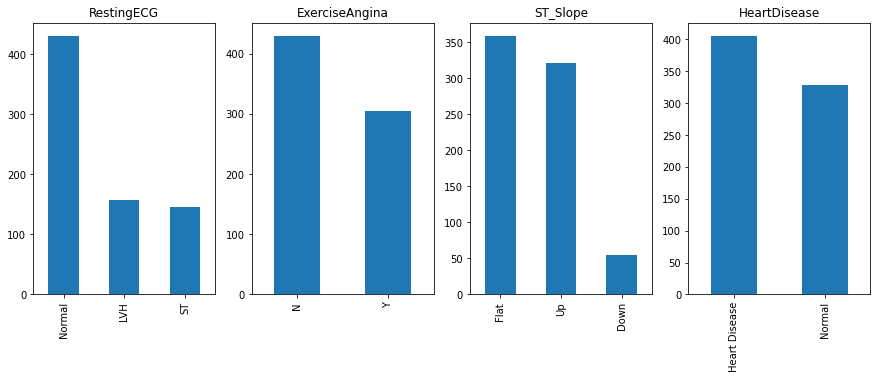

In [22]:
categorical_features2 = ['RestingECG','ExerciseAngina','ST_Slope','HeartDisease']
catgraph(categorical_features2) 

In [23]:
px.scatter(train_set,x='Age',y='RestingBP',color='Sex',size='RestingBP',labels={'RestingBP':'BloodPressure'},template='plotly_dark',opacity=1,color_discrete_sequence=px.colors.sequential.RdBu,title='Age Vs BloodPressure')

<AxesSubplot:xlabel='Sex'>

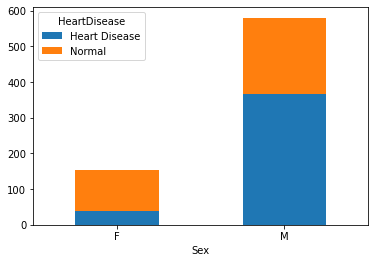

In [24]:
# hypothesis testing
cont_table1 = pd.crosstab(train_set['Sex'], train_set['HeartDisease'])
# print the contingency table
cont_table1
cont_table1.plot(kind="bar", stacked=True, rot=0)

<AxesSubplot:xlabel='ChestPainType'>

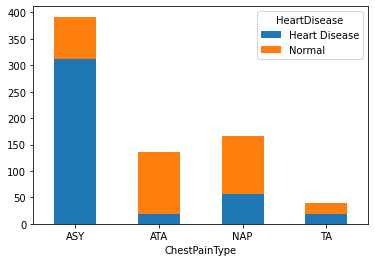

In [25]:
# hypothesis testing
cont_table2 = pd.crosstab(train_set['ChestPainType'], train_set['HeartDisease'])
# print the contingency table
cont_table2
cont_table2.plot(kind="bar", stacked=True, rot=0)

<AxesSubplot:xlabel='FastingBS'>

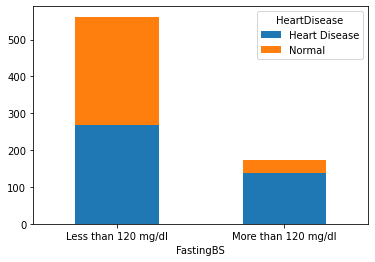

In [26]:
# hypothesis testing
cont_table3 = pd.crosstab(train_set['FastingBS'], train_set['HeartDisease'])
# print the contingency table
cont_table3
cont_table3.plot(kind="bar", stacked=True, rot=0)

<AxesSubplot:xlabel='RestingECG'>

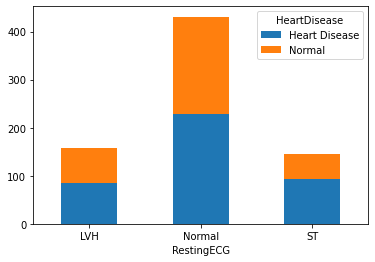

In [27]:
# hypothesis testing
cont_table4 = pd.crosstab(train_set['RestingECG'], train_set['HeartDisease'])
# print the contingency table
cont_table4
cont_table4.plot(kind="bar", stacked=True, rot=0)

<AxesSubplot:xlabel='ExerciseAngina'>

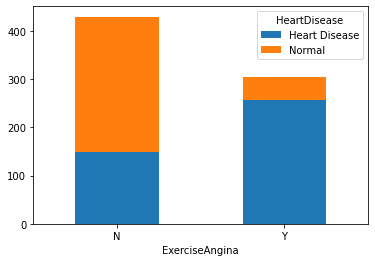

In [28]:
# hypothesis testing
cont_table5 = pd.crosstab(train_set['ExerciseAngina'], train_set['HeartDisease'])
# print the contingency table
cont_table5
cont_table5.plot(kind="bar", stacked=True, rot=0)

<AxesSubplot:xlabel='ST_Slope'>

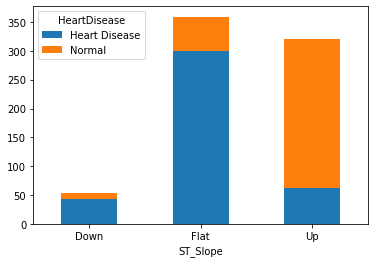

In [29]:
# hypothesis testing
cont_table6 = pd.crosstab(train_set['ST_Slope'], train_set['HeartDisease'])
# print the contingency table
cont_table6
cont_table6.plot(kind="bar", stacked=True, rot=0)

## Distribution of NUmerical Variables

In [30]:
numerical= train_set.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
numerical

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [31]:
x=train_set[numerical].iplot(kind='histogram',subplots=True,bins=50)

In [32]:
y=train_set.select_dtypes(["int64","float64"])

In [33]:
y.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
409,53,160,0,122,0.0
871,61,150,243,137,1.0
371,66,150,0,108,2.0
837,57,150,168,174,1.6
43,52,140,259,170,0.0


Text(0.5, 1.0, 'Correlatin Matrix')

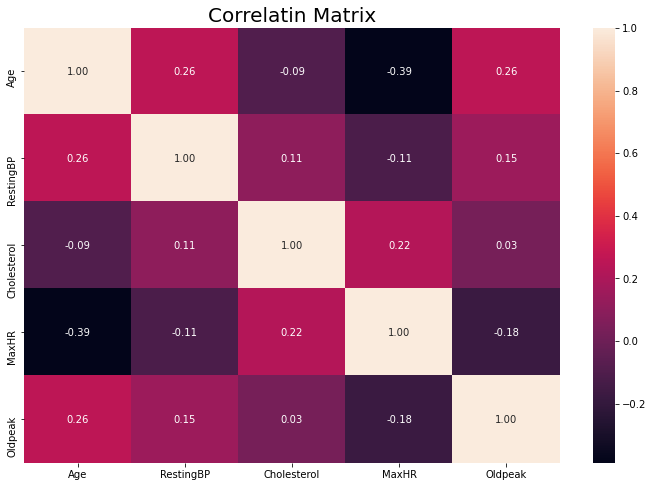

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(train_set.corr(), annot=True, fmt='.2f')
plt.title('Correlatin Matrix', fontsize=20)

In [35]:
from scipy.stats import skew

Age
-0.22150041392050915


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



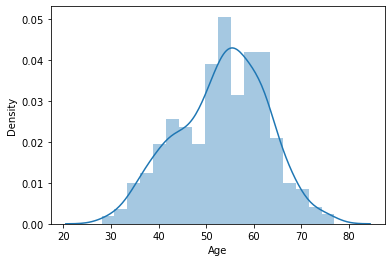

RestingBP
0.12706926112295264


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



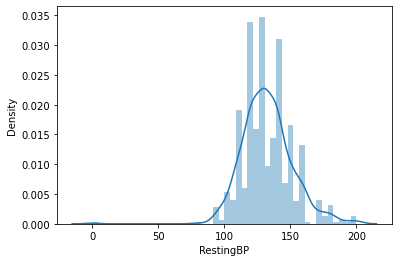

Cholesterol
-0.5534417744323701


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



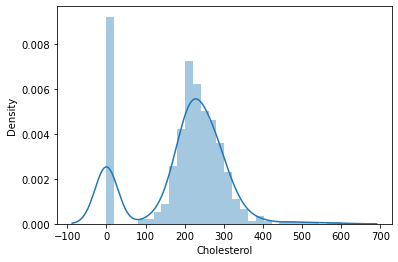

MaxHR
-0.12664062966496634


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



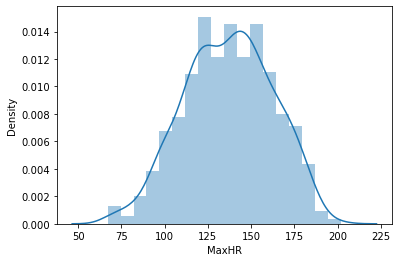

Oldpeak
1.0392743251763938


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



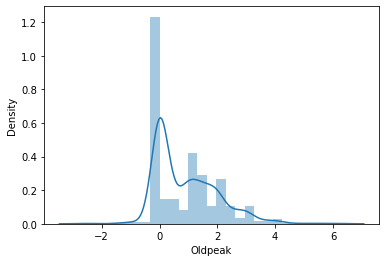

In [36]:
for col in y:
    print(col)
    print(skew(y[col]))
    
    plt.figure()
    sns.distplot(y[col])
    plt.show()

## Delete Capped values for Column Cholesterol

In [37]:
def delete_capped(df, col_names, capped_val):
    return df.drop(df[df[col_names]<=capped_val].index)

print(f"Before:{train_set.shape[0]} train instances ,{test_set.shape[0]} test instances")

train_set=delete_capped(train_set,"Cholesterol",0)
test_set=delete_capped(test_set,"Cholesterol",0)

print(f"After:{train_set.shape[0]} train instances ,{test_set.shape[0]} test instances")


Before:734 train instances ,184 test instances
After:598 train instances ,148 test instances


In [38]:
x=train_set[numerical].iplot(kind='histogram',subplots=True,bins=50)

In [39]:
z=train_set.select_dtypes(["int64","float64"])

Age
-0.13158189178372529


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



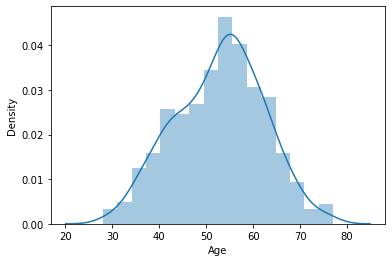

RestingBP
0.6395074907283733


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



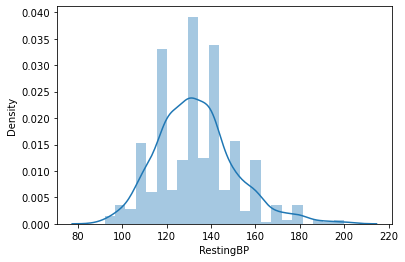

Cholesterol
1.3543717793751942


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



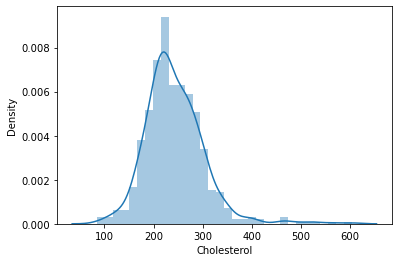

MaxHR
-0.18460612356144881


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



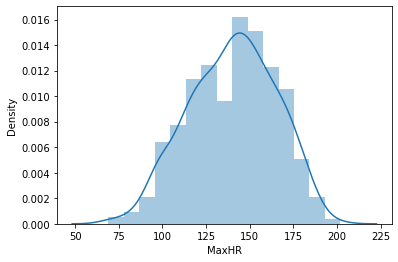

Oldpeak
1.2426474763245856


C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



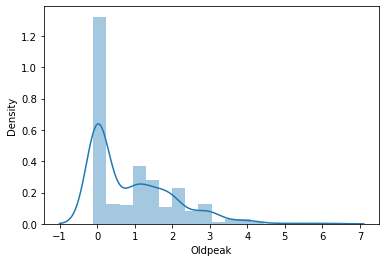

In [40]:
for col in z:
    print(col)
    print(skew(z[col]))
    
    plt.figure()
    sns.distplot(z[col])
    plt.show()

In [41]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = train_set[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

Cholesterol    1.357780
Oldpeak        1.245775
dtype: float64

## Outliers

In [42]:
fig = px.box(train_set,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [43]:
fig = px.box(train_set,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [44]:
fig = px.box(train_set,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [45]:
fig = px.box(train_set,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [46]:
fig = px.box(train_set,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

## Handling Null Values

In [47]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 871 to 580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             598 non-null    int64  
 1   Sex             598 non-null    object 
 2   ChestPainType   598 non-null    object 
 3   RestingBP       598 non-null    int64  
 4   Cholesterol     598 non-null    int64  
 5   FastingBS       598 non-null    object 
 6   RestingECG      598 non-null    object 
 7   MaxHR           598 non-null    int64  
 8   ExerciseAngina  598 non-null    object 
 9   Oldpeak         598 non-null    float64
 10  ST_Slope        598 non-null    object 
 11  HeartDisease    598 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 60.7+ KB


In [48]:
train_set.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Feature Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler=MinMaxScaler()

In [51]:
col_names=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
features=train_set[col_names]
scaler=MinMaxScaler().fit(features.values)
features=scaler.transform(features.values)

train_set[col_names]=features

In [52]:
train_set.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
871,0.673469,M,NAP,0.537037,0.305019,More than 120 mg/dl,Normal,0.511278,Y,0.174603,Flat,Normal
837,0.591837,M,NAP,0.537037,0.160232,Less than 120 mg/dl,Normal,0.789474,N,0.269841,Up,Normal
43,0.489796,M,NAP,0.444444,0.335907,Less than 120 mg/dl,ST,0.759398,N,0.015873,Up,Normal
432,0.714286,M,ASY,0.722222,0.177606,Less than 120 mg/dl,Normal,0.112782,Y,0.412698,Down,Heart Disease
734,0.571429,M,ASY,0.351852,0.382239,More than 120 mg/dl,LVH,0.255639,Y,0.269841,Down,Heart Disease


In [53]:
features=test_set[col_names]
features=scaler.transform(features.values)
test_set[col_names]=features

Text(0.5, 1.0, 'Correlatin Matrix')

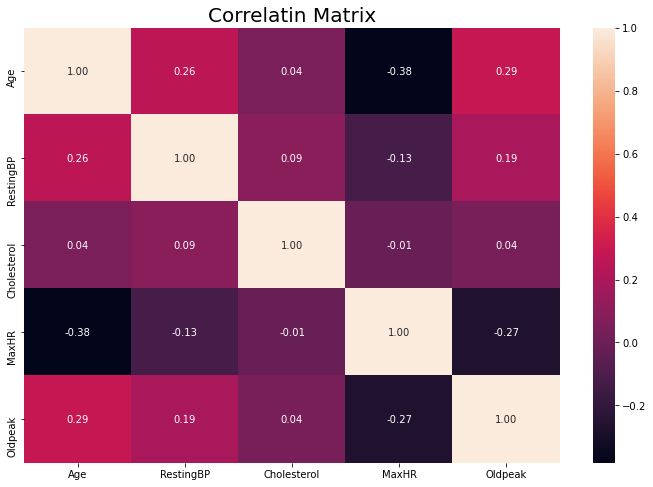

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(train_set.corr(), annot=True, fmt='.2f')
plt.title('Correlatin Matrix', fontsize=20)

In [55]:
columns1=["Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope"]

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder= OneHotEncoder(drop="first",sparse=False)


for col in columns1:
    cat_vals=train_set[col].values.reshape(-1,1)
    cat_vals = col+ "_" +cat_vals
    transformed=one_hot_encoder.fit_transform(cat_vals)
    col_names=one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, col_name in enumerate(col_names):
            train_set[col_name]=transformed[:,i]
            
            
    cat=test_set[col].values.reshape(-1,1)
    cat = col+ "_" +cat
    transformed=one_hot_encoder.transform(cat)
    for i, col_name in enumerate(col_names):
            test_set[col_name]=transformed[:,i]

In [56]:
train_set.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_More than 120 mg/dl,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
871,0.673469,M,NAP,0.537037,0.305019,More than 120 mg/dl,Normal,0.511278,Y,0.174603,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
837,0.591837,M,NAP,0.537037,0.160232,Less than 120 mg/dl,Normal,0.789474,N,0.269841,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
43,0.489796,M,NAP,0.444444,0.335907,Less than 120 mg/dl,ST,0.759398,N,0.015873,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
432,0.714286,M,ASY,0.722222,0.177606,Less than 120 mg/dl,Normal,0.112782,Y,0.412698,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
734,0.571429,M,ASY,0.351852,0.382239,More than 120 mg/dl,LVH,0.255639,Y,0.269841,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 871 to 580
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            598 non-null    float64
 1   Sex                            598 non-null    object 
 2   ChestPainType                  598 non-null    object 
 3   RestingBP                      598 non-null    float64
 4   Cholesterol                    598 non-null    float64
 5   FastingBS                      598 non-null    object 
 6   RestingECG                     598 non-null    object 
 7   MaxHR                          598 non-null    float64
 8   ExerciseAngina                 598 non-null    object 
 9   Oldpeak                        598 non-null    float64
 10  ST_Slope                       598 non-null    object 
 11  HeartDisease                   598 non-null    object 
 12  Sex_M                          598 non-null    f

In [58]:
cols_to_drop = ["Sex", "ChestPainType", "FastingBS", "RestingECG","ExerciseAngina","ST_Slope"]
train_set.drop(columns=cols_to_drop, inplace=True)
test_set.drop(columns=cols_to_drop, inplace=True)

In [59]:
train_set.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_More than 120 mg/dl,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
871,0.673469,0.537037,0.305019,0.511278,0.174603,Normal,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
837,0.591837,0.537037,0.160232,0.789474,0.269841,Normal,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
43,0.489796,0.444444,0.335907,0.759398,0.015873,Normal,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
432,0.714286,0.722222,0.177606,0.112782,0.412698,Heart Disease,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
734,0.571429,0.351852,0.382239,0.255639,0.269841,Heart Disease,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [60]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 871 to 580
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            598 non-null    float64
 1   RestingBP                      598 non-null    float64
 2   Cholesterol                    598 non-null    float64
 3   MaxHR                          598 non-null    float64
 4   Oldpeak                        598 non-null    float64
 5   HeartDisease                   598 non-null    object 
 6   Sex_M                          598 non-null    float64
 7   ChestPainType_ATA              598 non-null    float64
 8   ChestPainType_NAP              598 non-null    float64
 9   ChestPainType_TA               598 non-null    float64
 10  FastingBS_More than 120 mg/dl  598 non-null    float64
 11  RestingECG_Normal              598 non-null    float64
 12  RestingECG_ST                  598 non-null    f

# Model Building

## 1. Majority Class Baseline Model

In [61]:
train_set["HeartDisease"].value_counts()

Normal           312
Heart Disease    286
Name: HeartDisease, dtype: int64

In [62]:
n_normal = train_set["HeartDisease"].value_counts()["Normal"]
n_instances = train_set.shape[0]

In [63]:
# For the "Normal" label, the accuracy measures will be:
Normal_precision = n_normal/n_instances
Normal_recall = n_normal/n_normal
Normal_fscore = 2/(1/Normal_precision + 1/Normal_recall)

# For the "Heart Disease" label, it will be:
HeartDisease_precision = 0.0
HeartDisease_recall = 0.0
HeartDisease_fscore = 0.0

# The averages of the two classes, i.e. the eventual baseline scores:
p = (Normal_precision+HeartDisease_precision)/2
r = (Normal_recall+HeartDisease_recall)/2
f = (Normal_fscore+HeartDisease_fscore)/2

print(f"Precision: {p:.5}")
print(f"Recall: {r:.5}")
print(f"F-score: {f:.5}")

Precision: 0.26087
Recall: 0.5
F-score: 0.34286


In [64]:
Normal_fscore

0.6857142857142856

### Splitting the Train and Test data into Target Variable and Predictors

We create Xtrain & ytrain as the target variable and predictor for the train data and similary we create 
Xtest & yest as the target variable and preditor for the test data

In [65]:
Xtrain = train_set.drop("HeartDisease", axis=1)
ytrain = train_set["HeartDisease"].copy()

Xtest = test_set.drop("HeartDisease", axis=1)
ytest = test_set["HeartDisease"].copy()

## Checking the Target Variable count

Since we see that the count for each class is close to each other therfore we won't be require to Oversample our class 

In [66]:
ytrain.value_counts()

Normal           312
Heart Disease    286
Name: HeartDisease, dtype: int64

<AxesSubplot:>

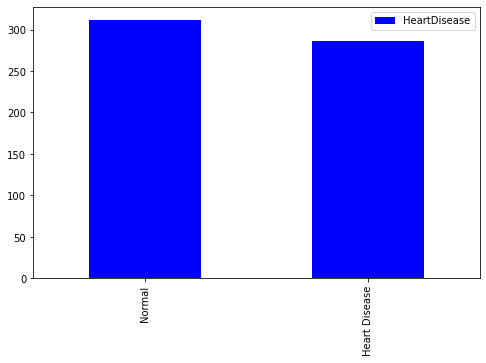

In [67]:
pd.DataFrame(ytrain.value_counts()).plot(kind="bar",figsize=(8,5),color="b")

## 1. Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
dtree=DecisionTreeClassifier(random_state=0)
model=dtree.fit(Xtrain,ytrain)
model

DecisionTreeClassifier(random_state=0)

In [69]:
y_pred=dtree.predict(Xtest)

In [70]:
y_pred_train=dtree.predict(Xtrain)

In [71]:
from sklearn import metrics

In [72]:
print("Accuracy:",metrics.accuracy_score(ytrain, y_pred_train))

Accuracy: 1.0


In [73]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.7635135135135135


[Text(495.27029220779224, 526.6125000000001, 'X[14] <= 0.5\ngini = 0.499\nsamples = 598\nvalue = [286, 312]'),
 Text(286.69967532467535, 492.63750000000005, 'X[3] <= 0.613\ngini = 0.325\nsamples = 314\nvalue = [250, 64]'),
 Text(149.46428571428572, 458.6625, 'X[5] <= 0.5\ngini = 0.23\nsamples = 256\nvalue = [222, 34]'),
 Text(70.65584415584416, 424.6875, 'X[12] <= 0.5\ngini = 0.473\nsamples = 39\nvalue = [24, 15]'),
 Text(43.48051948051948, 390.7125, 'X[1] <= 0.389\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(21.74025974025974, 356.7375, 'X[3] <= 0.214\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(10.87012987012987, 322.76250000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(32.61038961038961, 322.76250000000005, 'X[3] <= 0.605\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(21.74025974025974, 288.7875, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(43.48051948051948, 288.7875, 'X[4] <= 0.214\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(32.610389

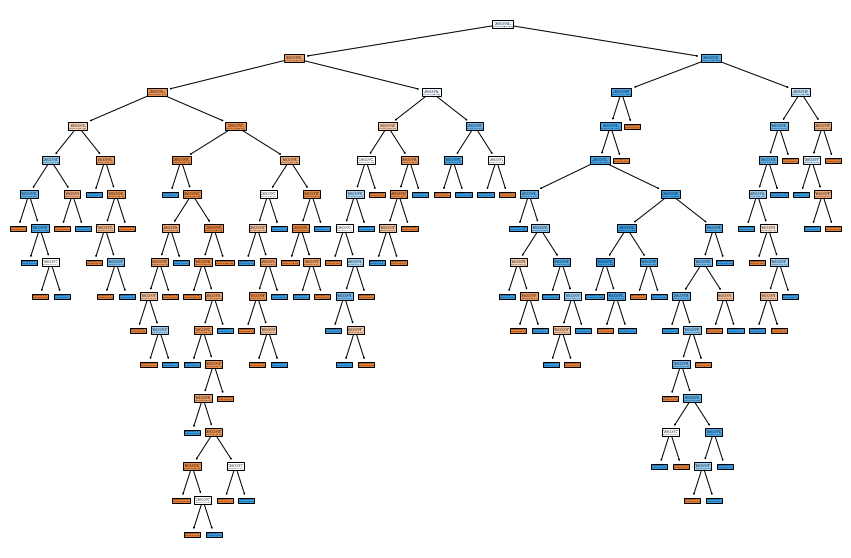

In [74]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)

## Post Pruning decision tree with cost complexity pruning 

The class decision tree classsifier provides parameters such as main_samples_leaf and max_depth to prevent a tree from overfitting. Cost complexity pruning provides another option to control the size of a tree.In  class: DecisionReeClassifier, this runing techinique is parameterized by the cost complexity paramneter, ccp_alpha.
Greater values of ccp_alpha  increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the tree and how to choose ccp_alpha based on validation scores

In [75]:
path=dtree.cost_complexity_pruning_path(Xtrain,ytrain)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [76]:
dtrees=[]
for ccp_alpha in ccp_alphas:
    dtree=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    dtree.fit(Xtrain,ytrain)
    dtrees.append(dtree)
print("Number of nodes in the last tree is :{} with ccp_alpha:{}".format(
        dtrees[-1].tree_.node_count,ccp_alphas[-1]))



Number of nodes in the last tree is :1 with ccp_alpha:0.22349617917491343


## Accuracy vs alpha for training and testing sets

When ccp_alpha is set to zero and keeping the other default parameters of :class DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 76% tesing accuracy. As alphas increases more of the tree is pruned thus creating a decision tree that generalizes better. In this   

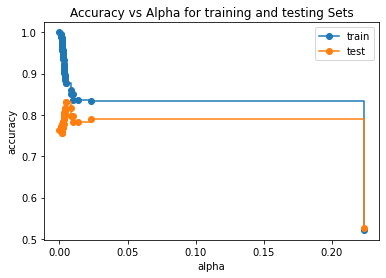

In [77]:
train_scores=[dtree.score(Xtrain,ytrain) for dtree in dtrees]
test_scores=[dtree.score(Xtest,ytest) for dtree in dtrees]

fig, ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing Sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [78]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
clf.fit(Xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.005, random_state=0)

In [79]:
y_pred_train=clf.predict(Xtrain)
y_pred=clf.predict(Xtest)

In [80]:
print("Accuracy:",metrics.accuracy_score(ytrain, y_pred_train))

Accuracy: 0.8762541806020067


In [81]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.831081081081081


[Text(482.8846153846154, 489.24, 'X[14] <= 0.5\ngini = 0.499\nsamples = 598\nvalue = [286, 312]'),
 Text(321.9230769230769, 380.52000000000004, 'X[3] <= 0.613\ngini = 0.325\nsamples = 314\nvalue = [250, 64]'),
 Text(193.15384615384616, 271.8, 'X[5] <= 0.5\ngini = 0.23\nsamples = 256\nvalue = [222, 34]'),
 Text(128.76923076923077, 163.08000000000004, 'X[12] <= 0.5\ngini = 0.473\nsamples = 39\nvalue = [24, 15]'),
 Text(64.38461538461539, 54.360000000000014, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(193.15384615384616, 54.360000000000014, 'gini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(257.53846153846155, 163.08000000000004, 'gini = 0.16\nsamples = 217\nvalue = [198, 19]'),
 Text(450.69230769230774, 271.8, 'X[7] <= 0.5\ngini = 0.499\nsamples = 58\nvalue = [28, 30]'),
 Text(386.3076923076923, 163.08000000000004, 'gini = 0.465\nsamples = 38\nvalue = [24, 14]'),
 Text(515.0769230769231, 163.08000000000004, 'gini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(643.846153846153

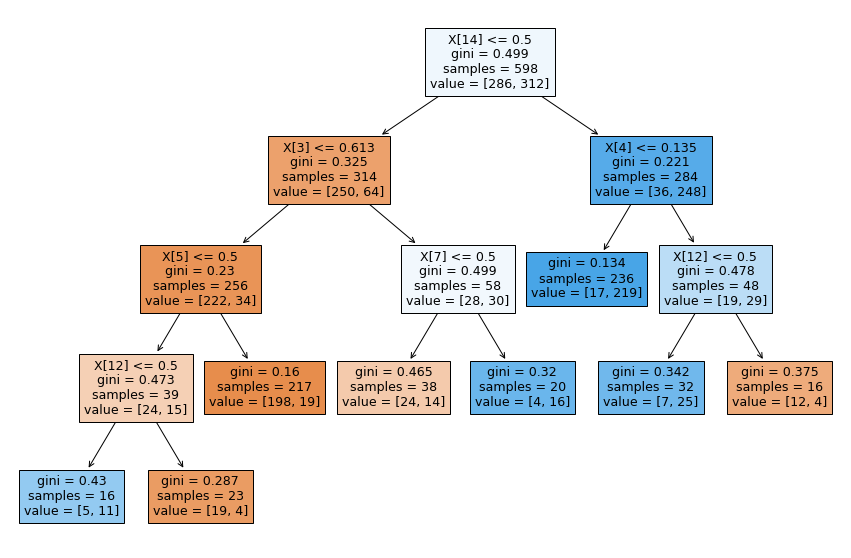

In [82]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [83]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s=precision_recall_fscore_support(ytrain,y_pred_train,average="macro")
print(p,r,f) 

0.8759957930540637 0.8766025641025641 0.8761419614867891


In [84]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s=precision_recall_fscore_support(ytest,y_pred,average="macro")
print(p,r,f) 

0.8307762557077626 0.8316849816849816 0.8308880661821838


In [85]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[59 11]
 [14 64]]
               precision    recall  f1-score   support

Heart Disease       0.81      0.84      0.83        70
       Normal       0.85      0.82      0.84        78

     accuracy                           0.83       148
    macro avg       0.83      0.83      0.83       148
 weighted avg       0.83      0.83      0.83       148



## Random Forest Classfier

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(Xtrain, ytrain)
train_pred=grid_search.predict(Xtrain)
test_pred=grid_search.predict(Xtest)
print("Classification Report for Train Data \n",classification_report(ytrain, train_pred) )
print("Classification Report for Test Data \n",classification_report(ytest, test_pred) )
end = time.time() - start
print(f"Took {end} seconds")

Classification Report for Train Data 
                precision    recall  f1-score   support

Heart Disease       0.89      0.91      0.90       286
       Normal       0.91      0.89      0.90       312

     accuracy                           0.90       598
    macro avg       0.90      0.90      0.90       598
 weighted avg       0.90      0.90      0.90       598

Classification Report for Test Data 
                precision    recall  f1-score   support

Heart Disease       0.80      0.84      0.82        70
       Normal       0.85      0.81      0.83        78

     accuracy                           0.82       148
    macro avg       0.82      0.83      0.82       148
 weighted avg       0.83      0.82      0.82       148

Took 79.5140130519867 seconds


In [87]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=7)

In [88]:
grid_search.best_score_

0.8709615106710504

In [89]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

9

In [90]:
y_pred

array(['Normal', 'Heart Disease', 'Heart Disease', 'Normal', 'Normal',
       'Heart Disease', 'Normal', 'Heart Disease', 'Heart Disease',
       'Heart Disease', 'Normal', 'Heart Disease', 'Normal', 'Normal',
       'Heart Disease', 'Heart Disease', 'Normal', 'Normal',
       'Heart Disease', 'Normal', 'Heart Disease', 'Normal', 'Normal',
       'Normal', 'Normal', 'Heart Disease', 'Normal', 'Heart Disease',
       'Heart Disease', 'Normal', 'Normal', 'Heart Disease', 'Normal',
       'Normal', 'Normal', 'Heart Disease', 'Heart Disease', 'Normal',
       'Heart Disease', 'Normal', 'Heart Disease', 'Normal',
       'Heart Disease', 'Heart Disease', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Heart Disease', 'Normal', 'Heart Disease',
       'Normal', 'Heart Disease', 'Normal', 'Normal', 'Normal',
       'Heart Disease', 'Normal', 'Heart Disease', 'Heart Disease',
       'Heart Disease', 'Heart Disease', 'Normal', 'Normal', 'Normal',
       'Heart Disease', 'Normal', 'Norm

In [91]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
9,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}",0.905836,0.870962,3.849971
23,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 1000}",0.936752,0.869352,7.195127
22,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}",0.936755,0.869350,7.195601
19,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 1000}",0.973192,0.867648,10.845169
12,"{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 10}",0.898312,0.866052,3.591226
15,"{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 1000}",0.905865,0.865972,4.403894
21,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}",0.937180,0.865952,7.600229
11,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 1000}",0.911705,0.865952,5.018442
10,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}",0.907941,0.865913,4.628955
18,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}",0.975711,0.864281,11.420460


## Feature Importance

In [92]:
# put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

ST_Slope_Up: 0.24909790171567497
ST_Slope_Flat: 0.17400371237606493
Oldpeak: 0.14335377335372038
ExerciseAngina_Y: 0.09604464121847199
MaxHR: 0.08038297403641143
Age: 0.051316970290859173
Sex_M: 0.046444486233998
RestingBP: 0.03977941294900675
ChestPainType_ATA: 0.039547184889088205
ChestPainType_NAP: 0.028726974935013548
Cholesterol: 0.026355822426117448
RestingECG_Normal: 0.008641430301464944
ChestPainType_TA: 0.005876116745964702
FastingBS_More than 120 mg/dl: 0.0054841903750463
RestingECG_ST: 0.004944408153097288


Text(0.5, 0, 'Relative Importance')

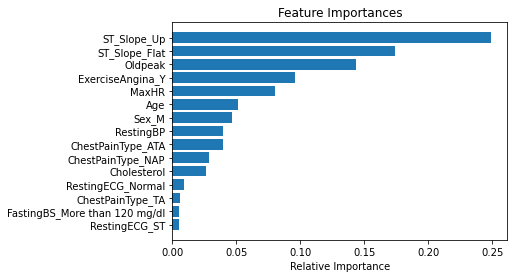

In [93]:
features=Xtrain.columns
indices = np.argsort(feature_importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Precision Recall and F-score on Test Data

In [94]:
from sklearn.metrics import precision_recall_fscore_support

yhat = grid_search.best_estimator_.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Random Forest:
Precision: 0.8243243243243243
Recall: 0.8252747252747252
F score: 0.8241959064327485


## Confusion Matrix for Train Data

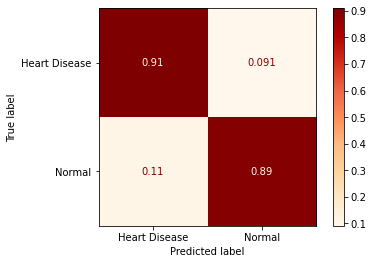

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
y_pred = grid_search.predict(Xtrain)
conf_mat = confusion_matrix(ytrain, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=grid_search.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

## Confusion Matrix for Test Data 

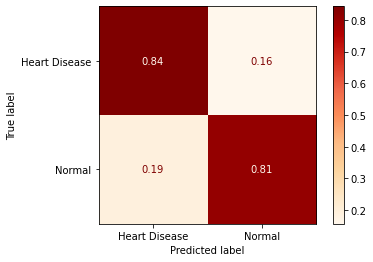

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
y_pred = grid_search.predict(Xtest)
conf_mat = confusion_matrix(ytest, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=grid_search.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 3 x 2 = 24 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [3, 5, 15],
    'min_samples_split': [5, 10],
    'max_features': [8]
}

# we'll use 5-fold cross-validation
grid_search_max = GridSearchCV(rf, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search_max.fit(Xtrain, ytrain)
train_pred=grid_search_max.predict(Xtrain)
test_pred=grid_search_max.predict(Xtest)
print("Classification Report for Train Data \n",classification_report(ytrain, train_pred) )
print("Classification Report for Test Data \n",classification_report(ytest, test_pred) )
end = time.time() - start
print(f"Took {end} seconds")

Classification Report for Train Data 
                precision    recall  f1-score   support

Heart Disease       0.91      0.93      0.92       286
       Normal       0.93      0.92      0.92       312

     accuracy                           0.92       598
    macro avg       0.92      0.92      0.92       598
 weighted avg       0.92      0.92      0.92       598

Classification Report for Test Data 
                precision    recall  f1-score   support

Heart Disease       0.81      0.83      0.82        70
       Normal       0.84      0.82      0.83        78

     accuracy                           0.82       148
    macro avg       0.82      0.82      0.82       148
 weighted avg       0.82      0.82      0.82       148

Took 88.18427562713623 seconds


In [98]:
grid_search_max.best_estimator_

RandomForestClassifier(max_depth=5, max_features=8, min_samples_split=5,
                       n_estimators=200, random_state=7)

In [99]:
grid_search_max.best_score_

0.8609038963671308

In [100]:
from sklearn.metrics import precision_recall_fscore_support

# rf
yhat = grid_search_max.best_estimator_.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Random Forest:
Precision: 0.8238304093567251
Recall: 0.8245421245421245
F score: 0.8240351198097677


# SVM(Support Vectore Machine)

## Linear SVM

In [101]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

lsvm = LinearSVC(random_state=7)

# specify the hyperparameters and their values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 3, 5],
    'max_iter': [5000]
}

# we'll use 5-fold cross-validation
grid_search_svm = GridSearchCV(lsvm, param_grid, cv=5, scoring='f1_macro', return_train_score=True) 

start = time.time()
grid_search_svm.fit(Xtrain, ytrain)
train_pred=grid_search_svm.predict(Xtrain)
test_pred=grid_search_svm.predict(Xtest)
print("Classification Report for Train Data \n",classification_report(ytrain, train_pred) )
print("Classification Report for Test Data \n",classification_report(ytest, test_pred) )
end = time.time() - start
print(f"Took {end} seconds")

Classification Report for Train Data 
                precision    recall  f1-score   support

Heart Disease       0.85      0.89      0.87       286
       Normal       0.90      0.86      0.88       312

     accuracy                           0.87       598
    macro avg       0.87      0.87      0.87       598
 weighted avg       0.87      0.87      0.87       598

Classification Report for Test Data 
                precision    recall  f1-score   support

Heart Disease       0.82      0.87      0.85        70
       Normal       0.88      0.83      0.86        78

     accuracy                           0.85       148
    macro avg       0.85      0.85      0.85       148
 weighted avg       0.85      0.85      0.85       148

Took 0.5725057125091553 seconds


In [102]:
grid_search_svm.best_estimator_

LinearSVC(C=0.1, max_iter=5000, random_state=7)

In [103]:
grid_search_svm.best_score_

0.8693191316289773

In [104]:
cv_results = pd.DataFrame(grid_search_svm.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
2,"{'C': 0.1, 'max_iter': 5000}",0.872427,0.869319,0.356188
1,"{'C': 0.01, 'max_iter': 5000}",0.871618,0.866035,0.640569
3,"{'C': 1, 'max_iter': 5000}",0.871960,0.864239,0.885568
4,"{'C': 3, 'max_iter': 5000}",0.874044,0.862568,1.313013
5,"{'C': 5, 'max_iter': 5000}",0.874043,0.862568,1.312949
0,"{'C': 0.001, 'max_iter': 5000}",0.852775,0.852669,0.012393


## SVM with Radial Basis Function

In [105]:
from sklearn.svm import SVC

svm = SVC(random_state=7, kernel='rbf')

# specify the hyperparameters and their values
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ["scale", "auto", 0.1],
}

# we'll use 5-fold cross-validation
grid_search_rbf = GridSearchCV(svm, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search_rbf.fit(Xtrain, ytrain)
train_pred=grid_search_rbf.predict(Xtrain)
test_pred=grid_search_rbf.predict(Xtest)
print("Classification Report for Train Data \n",classification_report(ytrain, train_pred) )
print("Classification Report for Test Data \n",classification_report(ytest, test_pred) )
end = time.time() - start
print(f"Took {end} seconds")

Classification Report for Train Data 
                precision    recall  f1-score   support

Heart Disease       0.87      0.90      0.88       286
       Normal       0.90      0.88      0.89       312

     accuracy                           0.89       598
    macro avg       0.89      0.89      0.89       598
 weighted avg       0.89      0.89      0.89       598

Classification Report for Test Data 
                precision    recall  f1-score   support

Heart Disease       0.83      0.84      0.84        70
       Normal       0.86      0.85      0.85        78

     accuracy                           0.84       148
    macro avg       0.84      0.84      0.84       148
 weighted avg       0.84      0.84      0.84       148

Took 3.813859701156616 seconds


In [106]:
grid_search_rbf.best_estimator_

SVC(C=10, gamma='auto', random_state=7)

In [107]:
grid_search_rbf.best_score_

0.8676059393810374

### Polynomial SVM

In [108]:
from sklearn.svm import SVC

svm_poly = SVC(kernel="poly", gamma="scale", random_state=7, degree=2)

# specify the hyperparameters and their values
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
}

# we'll use 5-fold cross-validation
grid_search_poly = GridSearchCV(svm_poly, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search_poly.fit(Xtrain, ytrain)
train_pred=grid_search_poly.predict(Xtrain)
test_pred=grid_search_poly.predict(Xtest)
print("Classification Report for Train Data \n",classification_report(ytrain, train_pred) )
print("Classification Report for Test Data \n",classification_report(ytest, test_pred) )
end = time.time() - start
print(f"Took {end} seconds")

Classification Report for Train Data 
                precision    recall  f1-score   support

Heart Disease       0.89      0.93      0.91       286
       Normal       0.93      0.90      0.92       312

     accuracy                           0.91       598
    macro avg       0.91      0.91      0.91       598
 weighted avg       0.91      0.91      0.91       598

Classification Report for Test Data 
                precision    recall  f1-score   support

Heart Disease       0.78      0.83      0.81        70
       Normal       0.84      0.79      0.82        78

     accuracy                           0.81       148
    macro avg       0.81      0.81      0.81       148
 weighted avg       0.81      0.81      0.81       148

Took 0.901444673538208 seconds


In [109]:
grid_search_poly.best_estimator_

SVC(C=10, degree=2, kernel='poly', random_state=7)

In [110]:
grid_search_poly.best_score_

0.8708493918600485

In [111]:
cv_results = pd.DataFrame(grid_search_poly.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
3,{'C': 10},0.920918,0.870849,5.436795
2,{'C': 1},0.897437,0.864291,3.693394
1,{'C': 0.1},0.869053,0.855573,1.551092
0,{'C': 0.01},0.859938,0.855483,0.518081
4,{'C': 100},0.940160,0.827348,11.999214


### Precision, Recall, F-score for Linear SVM 

In [112]:
from sklearn.metrics import precision_recall_fscore_support

# rf
yhat = grid_search_svm.best_estimator_.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("Linear SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Linear SVM:
Precision: 0.8513513513513513
Recall: 0.8523809523809525
F score: 0.8512426900584795


### Precision, Recall, F-score for Radial Basis Function SVM 

In [113]:
from sklearn.metrics import precision_recall_fscore_support

# rf
yhat = grid_search_rbf.best_estimator_.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("RBF SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

RBF SVM:
Precision: 0.8440643863179074
Recall: 0.8445054945054945
F score: 0.84424616792496


### Precision, Recall, F-score for Polynomial SVM 

In [114]:
from sklearn.metrics import precision_recall_fscore_support

# rf
yhat = grid_search_poly.best_estimator_.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("SVM Polynomial:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

SVM Polynomial:
Precision: 0.8108108108108107
Recall: 0.8117216117216117
F score: 0.810672514619883


Since the best Precision , Recall and F-score obtained is from Linear SVM when compared with POlynomial and Radial Basis we can draw confusion matrix for Linear SVM

### Confusion Matrix for Train Data

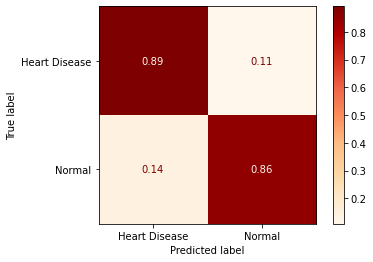

In [115]:
y_pred = grid_search_svm.predict(Xtrain)
conf_mat = confusion_matrix(ytrain, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=grid_search_svm.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

### Confusion Matrix for Test Data

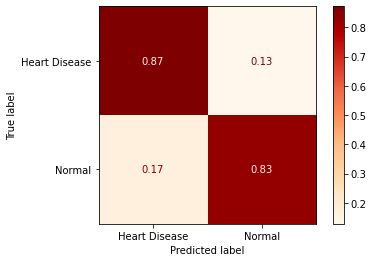

In [116]:
y_pred = grid_search_svm.predict(Xtest)
conf_mat = confusion_matrix(ytest, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=grid_search_svm.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

## Logistic Regression Model

In [117]:
from sklearn.linear_model import LogisticRegression

logmodal=LogisticRegression(solver='lbfgs')

param_grid = {
    'C':[0.001,0.01,0.1],
    'max_iter':[100,1000,2500]
    }

logis_grid_search = GridSearchCV(logmodal, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
logis_grid_search.fit(Xtrain, ytrain)
train_pred=logis_grid_search.predict(Xtrain)
test_pred=logis_grid_search.predict(Xtest)
print("Classification Report for Train Data \n",classification_report(ytrain, train_pred) )
print("Classification Report for Test Data \n",classification_report(ytest, test_pred) )
end = time.time() - start
print(f"Took {end} seconds")

Classification Report for Train Data 
                precision    recall  f1-score   support

Heart Disease       0.85      0.89      0.87       286
       Normal       0.89      0.85      0.87       312

     accuracy                           0.87       598
    macro avg       0.87      0.87      0.87       598
 weighted avg       0.87      0.87      0.87       598

Classification Report for Test Data 
                precision    recall  f1-score   support

Heart Disease       0.81      0.86      0.83        70
       Normal       0.86      0.82      0.84        78

     accuracy                           0.84       148
    macro avg       0.84      0.84      0.84       148
 weighted avg       0.84      0.84      0.84       148

Took 1.0671844482421875 seconds


In [118]:
logis_grid_search.best_estimator_

LogisticRegression(C=0.1)

In [119]:
logis_grid_search.best_score_

0.8643130157265473

### Precision, Recall and F1-Score Using Macro Averaging

In [120]:
from sklearn.metrics import precision_recall_fscore_support

# rf
yhat = logis_grid_search.best_estimator_.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("Logistic Regression:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Logistic Regression:
Precision: 0.8378378378378379
Recall: 0.8388278388278387
F score: 0.8377192982456141


### Confusion Matrix For Train Data

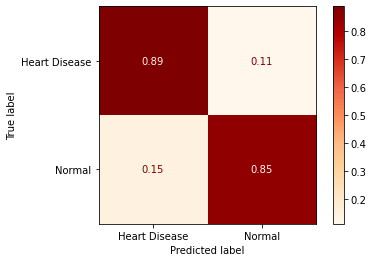

In [121]:
y_pred = logis_grid_search.predict(Xtrain)
conf_mat = confusion_matrix(ytrain, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=logis_grid_search.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

### Confusion Matrix for Test Data

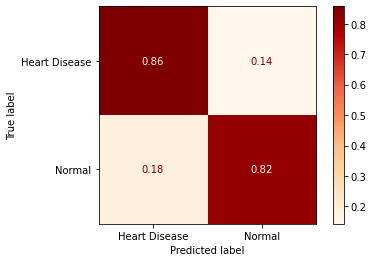

In [122]:
y_pred = logis_grid_search.predict(Xtest)
conf_mat = confusion_matrix(ytest, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=logis_grid_search.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

## KNN Model

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
KNN=KNeighborsClassifier(metric="euclidean",p=2)

param_grid={
    'n_neighbors':range(5,12),
    
}

grid_search_knn=GridSearchCV(KNN,param_grid,scoring='f1_macro', 
                           return_train_score=True)
start = time.time()
grid_search_knn.fit(Xtrain, ytrain)
train_pred=grid_search_knn.predict(Xtrain)
test_pred=grid_search_knn.predict(Xtest)
print("Classification Report for Train Data \n",classification_report(ytrain, train_pred) )
print("Classification Report for Test Data \n",classification_report(ytest, test_pred) )
end = time.time() - start
print(f"Took {end} seconds")


Classification Report for Train Data 
                precision    recall  f1-score   support

Heart Disease       0.84      0.92      0.88       286
       Normal       0.92      0.84      0.88       312

     accuracy                           0.88       598
    macro avg       0.88      0.88      0.88       598
 weighted avg       0.88      0.88      0.88       598

Classification Report for Test Data 
                precision    recall  f1-score   support

Heart Disease       0.77      0.86      0.81        70
       Normal       0.86      0.77      0.81        78

     accuracy                           0.81       148
    macro avg       0.81      0.81      0.81       148
 weighted avg       0.82      0.81      0.81       148

Took 1.790104866027832 seconds


In [124]:
grid_search_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [125]:
grid_search_knn.best_score_

0.8695201942870483

## Precision, recall And F1-Score for Test Data

In [126]:
from sklearn.metrics import precision_recall_fscore_support

# rf
yhat = grid_search_knn.best_estimator_.predict(Xtest)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(ytest, yhat, average="macro")
print("KNN:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

KNN:
Precision: 0.8131868131868132
Recall: 0.8131868131868132
F score: 0.8108108108108107


## Confusion Matrix For Train Data

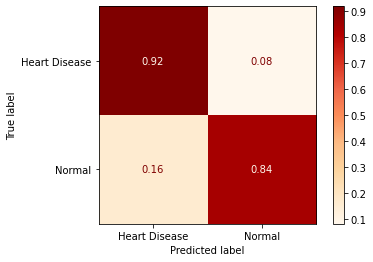

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
y_pred = grid_search_knn.predict(Xtrain)
conf_mat = confusion_matrix(ytrain, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=grid_search_knn.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)

 ## Confusion Matrix for Test Data

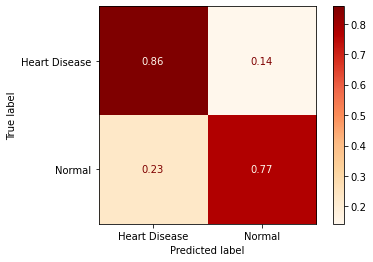

In [128]:
y_pred = grid_search_knn.predict(Xtest)
conf_mat = confusion_matrix(ytest, y_pred, normalize="true")
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=grid_search_knn.best_estimator_.classes_
                      ).plot(cmap=plt.cm.OrRd)